In [1]:

import numpy as np # linear algebra
import pandas as pd

In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import gc

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

In [6]:
raw_data = pd.read_csv('Advertising.csv')
raw_data.head(25)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [7]:
print(raw_data.shape)

(200, 5)


In [8]:
print('\nThe number of null values in the dataset is : \n' + str(raw_data.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(raw_data.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(raw_data.info())
print('\nThe data distribution in the columns is given by :\n')
print(raw_data.describe())
print('\nThe number of unique values in the Unnamed: 0 is : ' + str(len(raw_data['Unnamed: 0'].unique())))
print('\nThe number of unique values in the TV column is : ' + str(len(raw_data['TV'].unique())))
print('\nThe number of unique values in the Radio column is : ' + str(len(raw_data['Radio'].unique())))
print('\nThe number of unique values in the Newspaper column is : ' + str(len(raw_data['Newspaper'].unique())))
print('\nThe number of unique values in the Sales column is : ' + str(len(raw_data['Sales'].unique())))


The number of null values in the dataset is : 
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

The data distribution in the columns is given by :

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
m

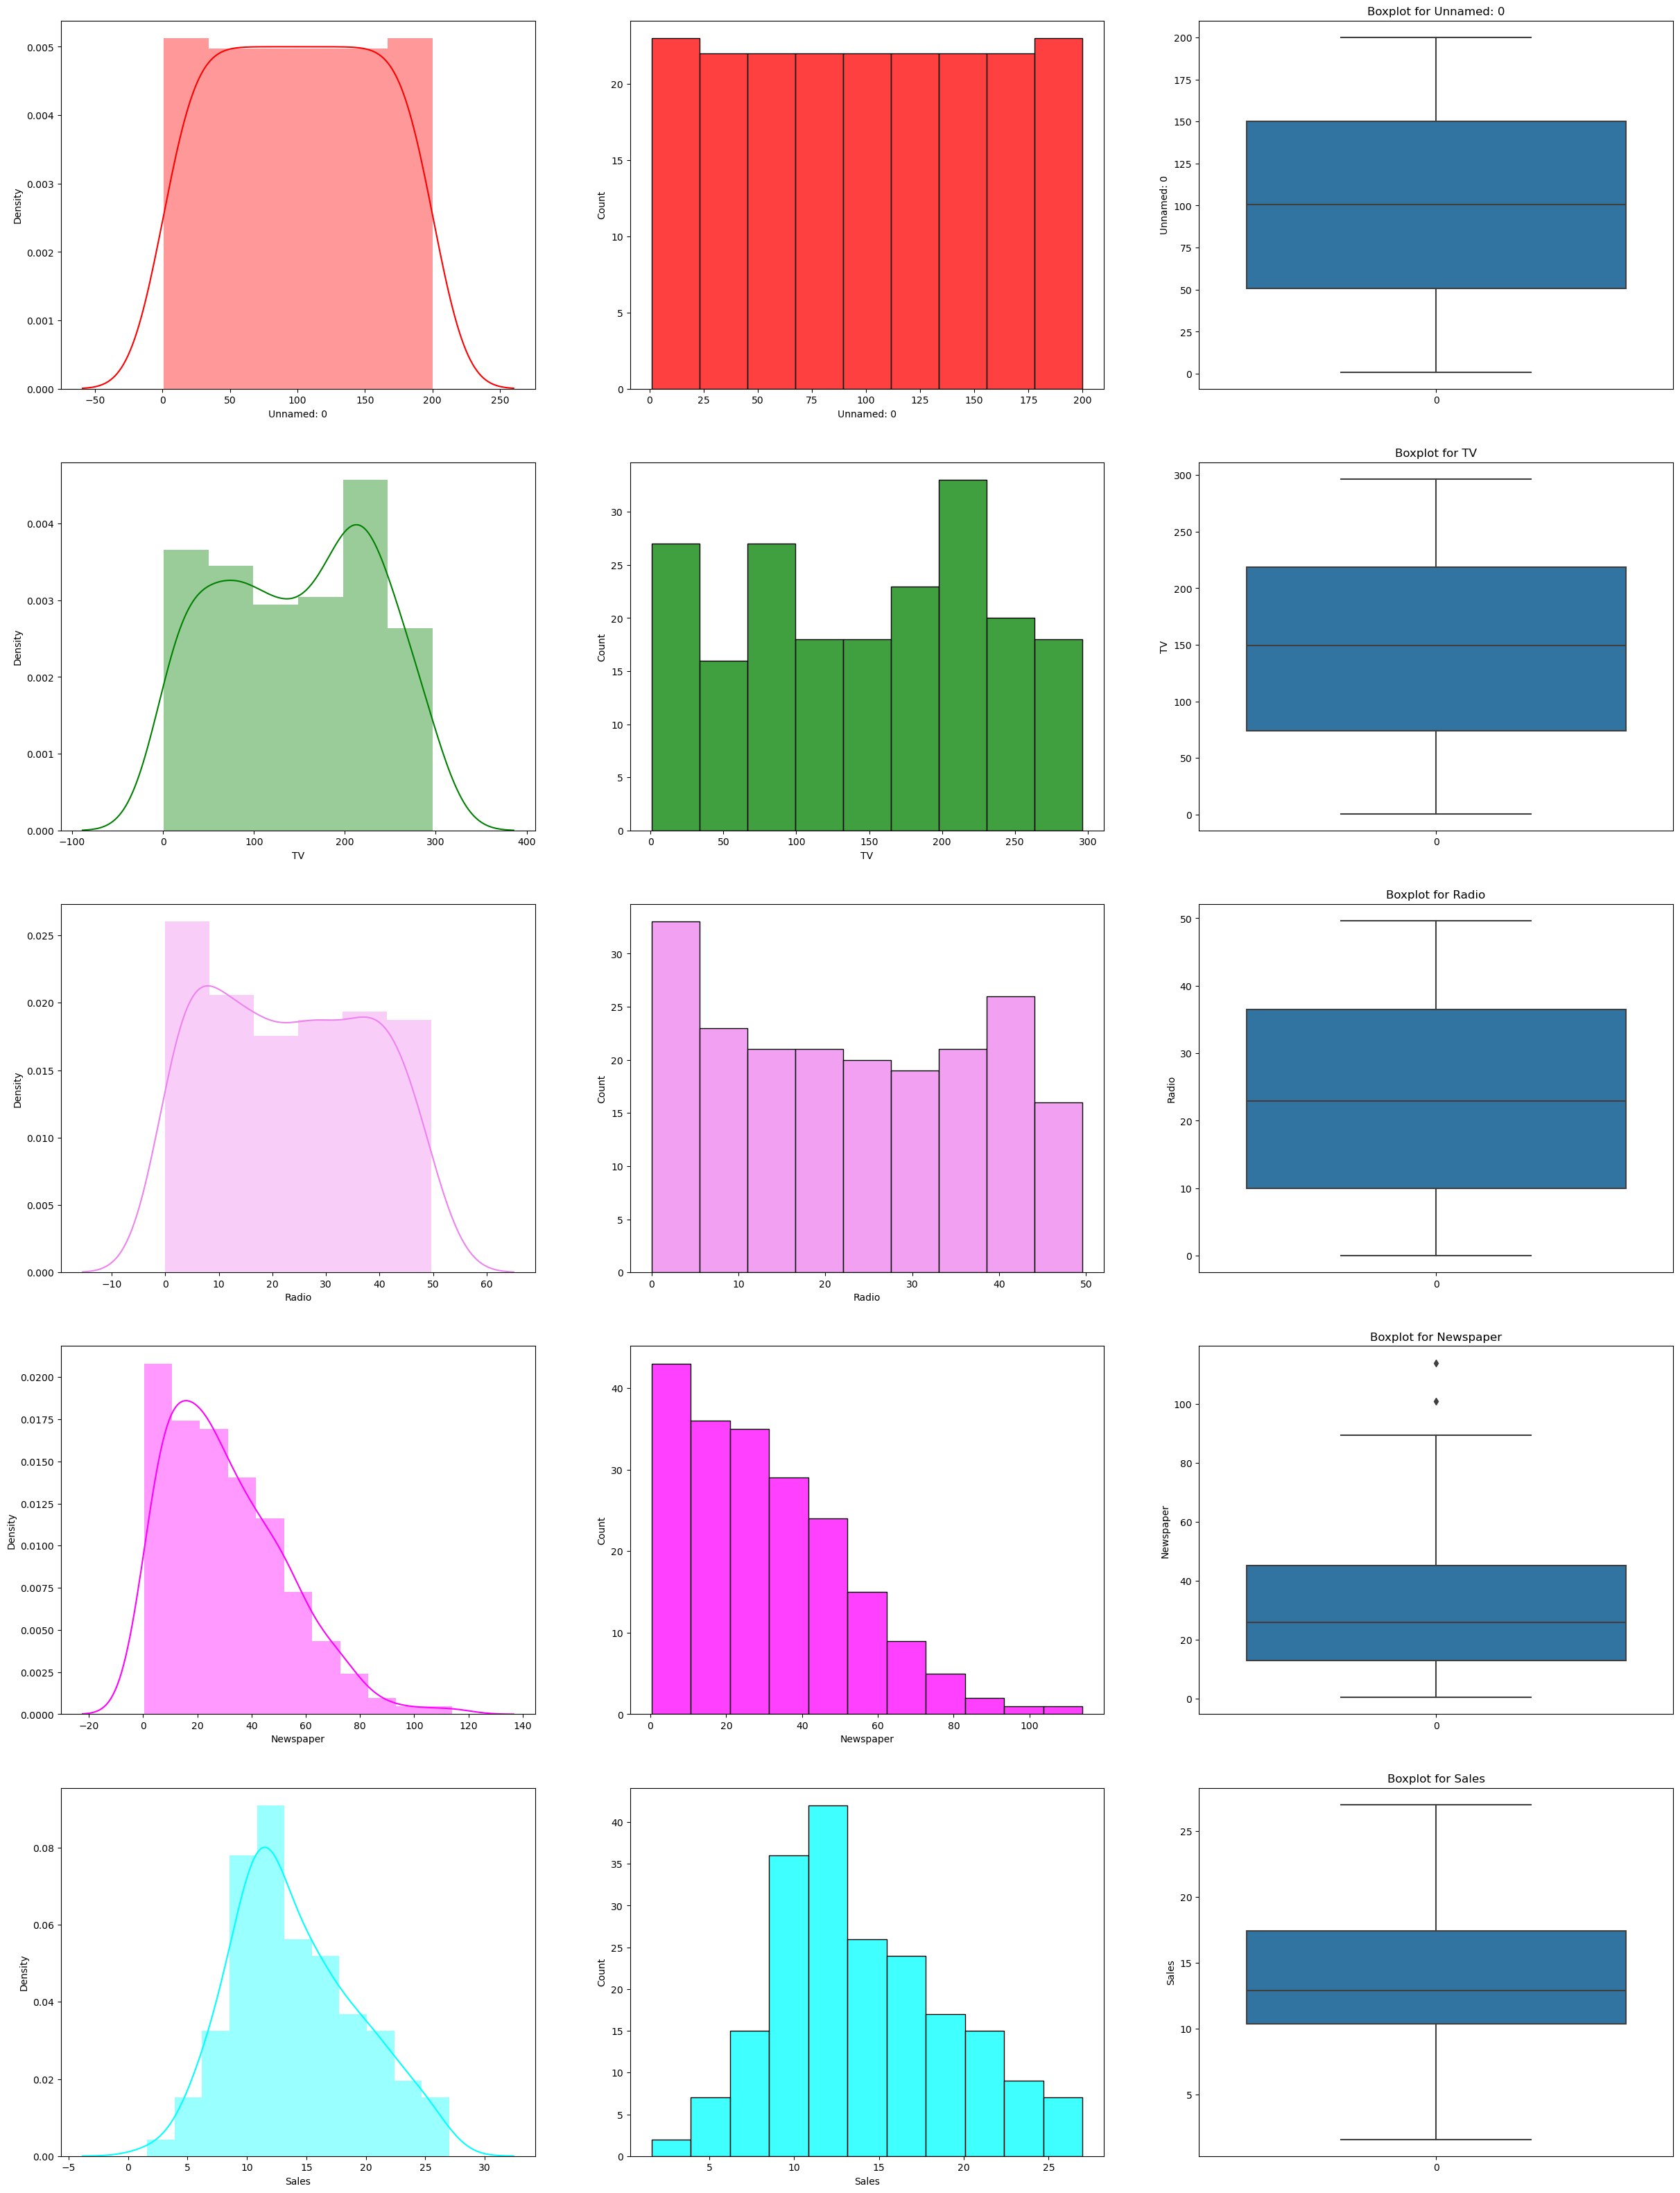

In [13]:
plt.figure(figsize=(30, 40))
plt.tight_layout(pad=2.0)

plt.subplot(5, 3, 1)
sns.distplot(raw_data['Unnamed: 0'], color='red')
plt.subplot(5, 3, 2)
sns.histplot(raw_data['Unnamed: 0'], color='red')
plt.subplot(5, 3, 3)
sns.boxplot(raw_data['Unnamed: 0'])
plt.ylabel('Unnamed: 0')
plt.title('Boxplot for Unnamed: 0')

plt.subplot(5, 3, 4)
sns.distplot(raw_data['TV'], color='green')
plt.subplot(5, 3, 5)
sns.histplot(raw_data['TV'], color='green')
plt.subplot(5, 3, 6)
sns.boxplot(raw_data['TV'])
plt.ylabel('TV')
plt.title('Boxplot for TV')

plt.subplot(5, 3, 7)
sns.distplot(raw_data['Radio'], color='violet')
plt.subplot(5, 3, 8)
sns.histplot(raw_data['Radio'], color='violet')
plt.subplot(5, 3, 9)
sns.boxplot(raw_data['Radio'])
plt.ylabel('Radio')
plt.title('Boxplot for Radio')

plt.subplot(5, 3, 10)
sns.distplot(raw_data['Newspaper'], color='magenta')
plt.subplot(5, 3, 11)
sns.histplot(raw_data['Newspaper'], color='magenta')
plt.subplot(5, 3, 12)
sns.boxplot(raw_data['Newspaper'])
plt.ylabel('Newspaper')
plt.title('Boxplot for Newspaper')

plt.subplot(5, 3, 13)
sns.distplot(raw_data['Sales'], color='cyan')
plt.subplot(5, 3, 14)
sns.histplot(raw_data['Sales'], color='cyan')
plt.subplot(5, 3, 15)
sns.boxplot(raw_data['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot for Sales')

plt.show()  # You need to show the plot at the end


<Axes: >

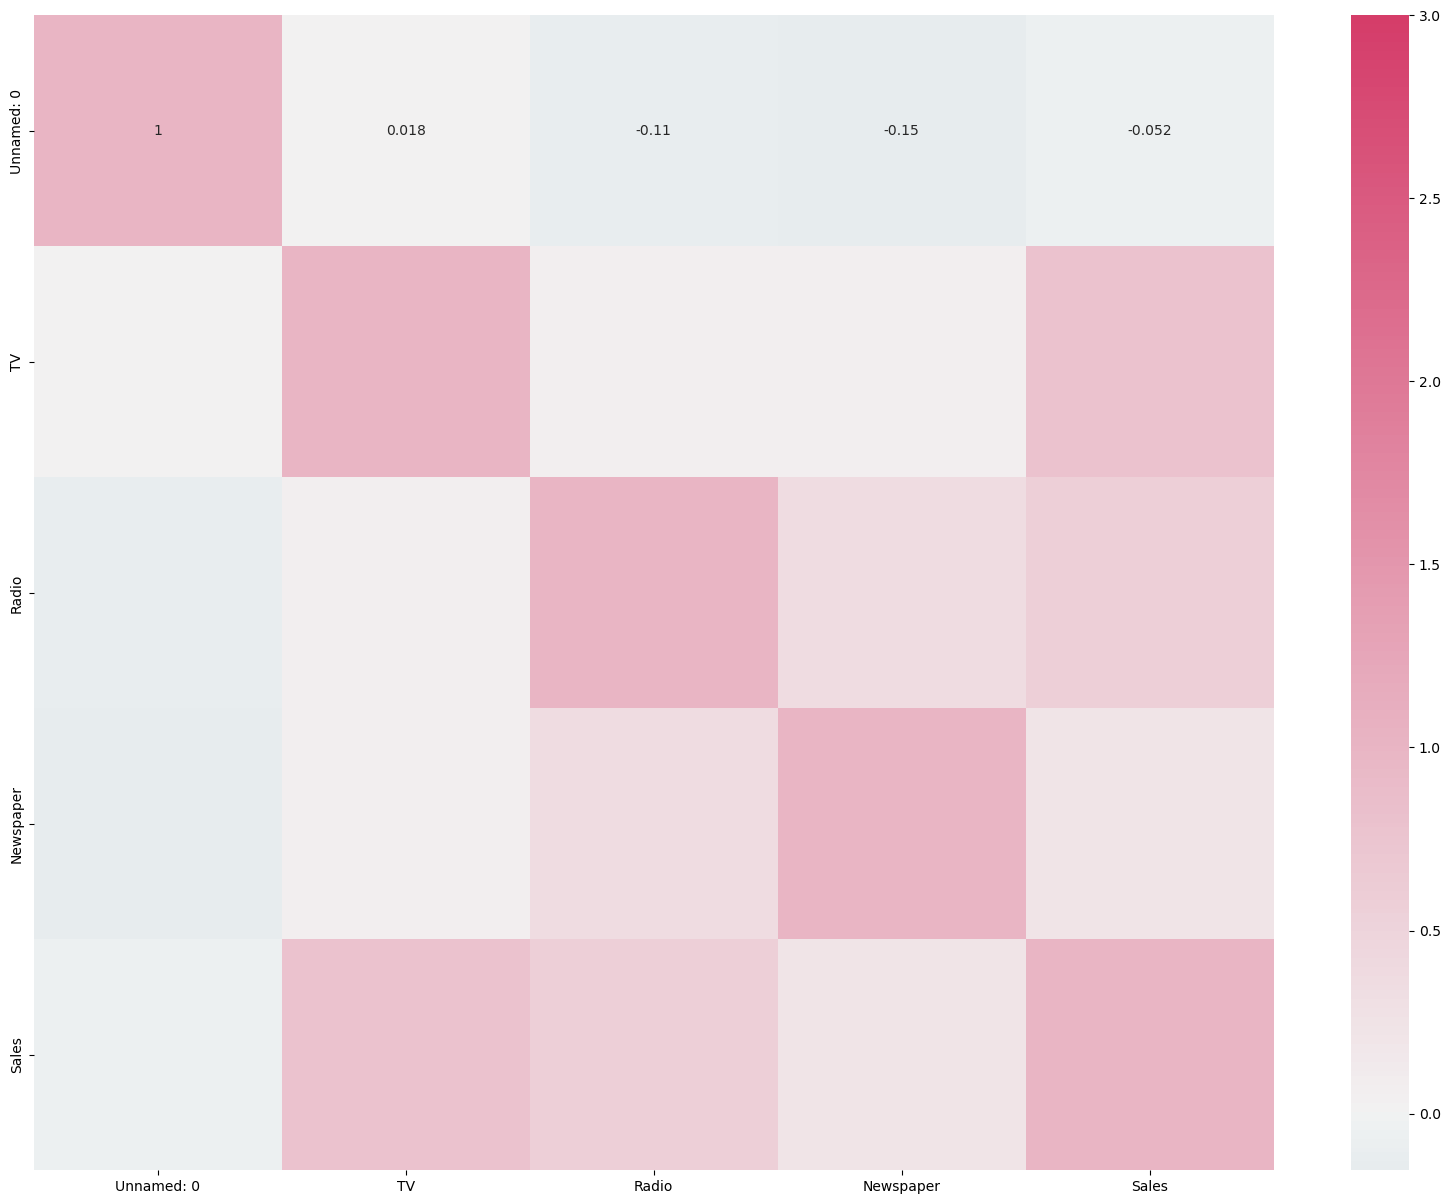

In [14]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (20,15))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(raw_data.iloc[:,:].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

<Figure size 3000x7000 with 0 Axes>

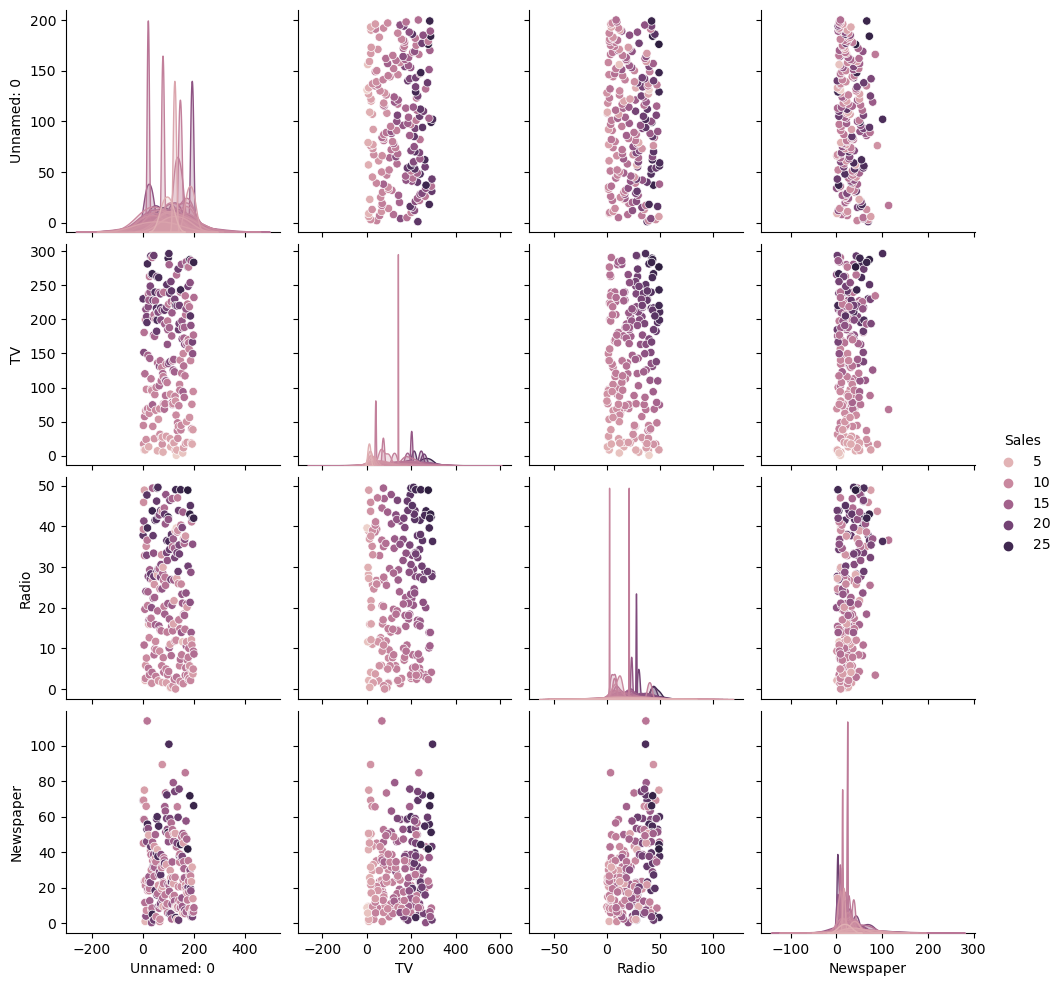

In [15]:
plt.figure(figsize = (30,70))
plt.tight_layout(pad = 3.0)
sns.pairplot(raw_data, hue = 'Sales')

In [16]:
sales_data = raw_data

### Dropping redundant Data
sales_data = sales_data.drop(['Unnamed: 0'], axis = 1)

### Scaling the TV Values
tv_scaler = MinMaxScaler()
sales_data['TV'] = tv_scaler.fit_transform(np.array(sales_data['TV']).reshape(-1,1))

### Scaling the Radio Values
radio_scaler = MinMaxScaler()
sales_data['Radio'] = radio_scaler.fit_transform(np.array(sales_data['Radio']).reshape(-1,1))

### Scaling the Newspaper Values
newspaper_scaler = MinMaxScaler()
sales_data['Newspaper'] = newspaper_scaler.fit_transform(np.array(sales_data['Newspaper']).reshape(-1,1))

### Scaling the Sales Values
sales_scaler = StandardScaler()
sales_data['Sales'] = sales_scaler.fit_transform(np.array(sales_data['Sales']).reshape(-1,1))


Text(0.5, 1.0, 'Boxplot for Sales')

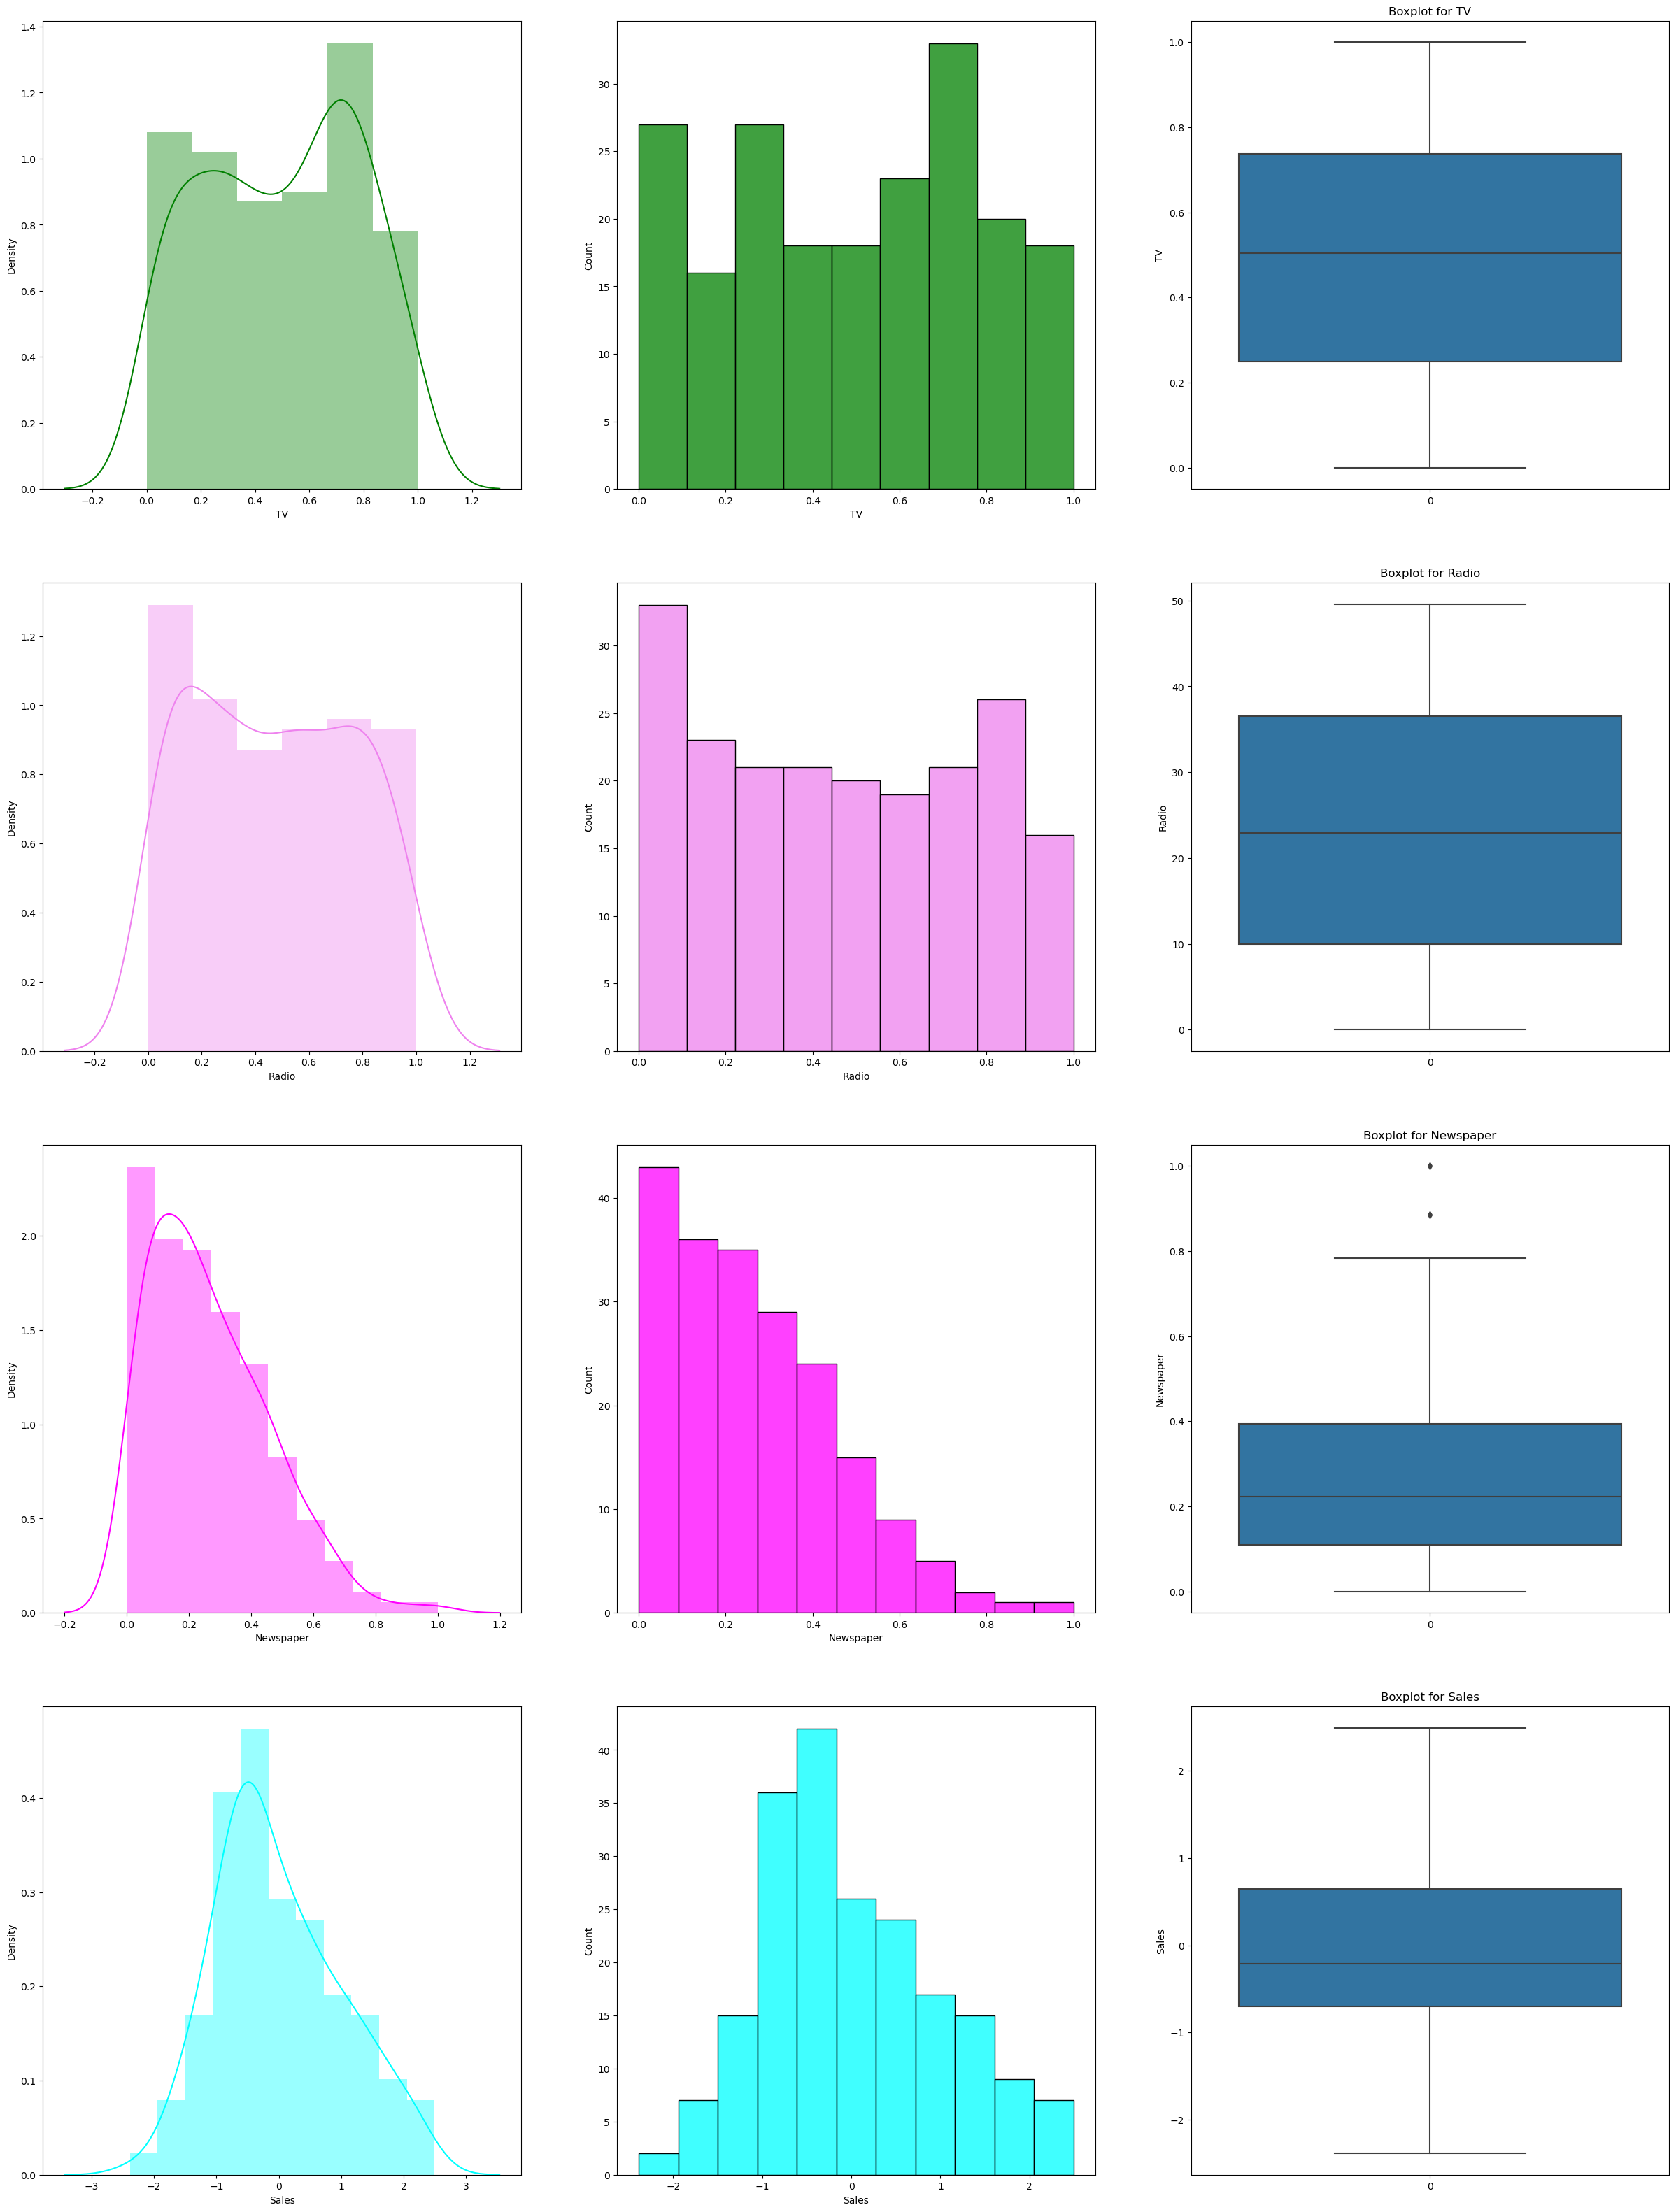

In [17]:
plt.figure(figsize = (30,40))
plt.tight_layout(pad = 2.0)

plt.subplot(4,3,1)
sns.distplot(sales_data['TV'],color = 'green')
plt.subplot(4,3,2)
sns.histplot(sales_data['TV'],color = 'green')
plt.subplot(4,3,3)
sns.boxplot(sales_data['TV'])
plt.ylabel('TV')
plt.title('Boxplot for TV')

plt.subplot(4,3,4)
sns.distplot(sales_data['Radio'],color = 'violet')
plt.subplot(4,3,5)
sns.histplot(sales_data['Radio'],color = 'violet')
plt.subplot(4,3,6)
sns.boxplot(raw_data['Radio'])
plt.ylabel('Radio')
plt.title('Boxplot for Radio')

plt.subplot(4,3,7)
sns.distplot(sales_data['Newspaper'],color = 'magenta')
plt.subplot(4,3,8)
sns.histplot(sales_data['Newspaper'],color = 'magenta')
plt.subplot(4,3,9)
sns.boxplot(sales_data['Newspaper'])
plt.ylabel('Newspaper')
plt.title('Boxplot for Newspaper')

plt.subplot(4,3,10)
sns.distplot(sales_data['Sales'],color = 'cyan')
plt.subplot(4,3,11)
sns.histplot(sales_data['Sales'],color = 'cyan')
plt.subplot(4,3,12)
sns.boxplot(sales_data['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot for Sales')

<Axes: >

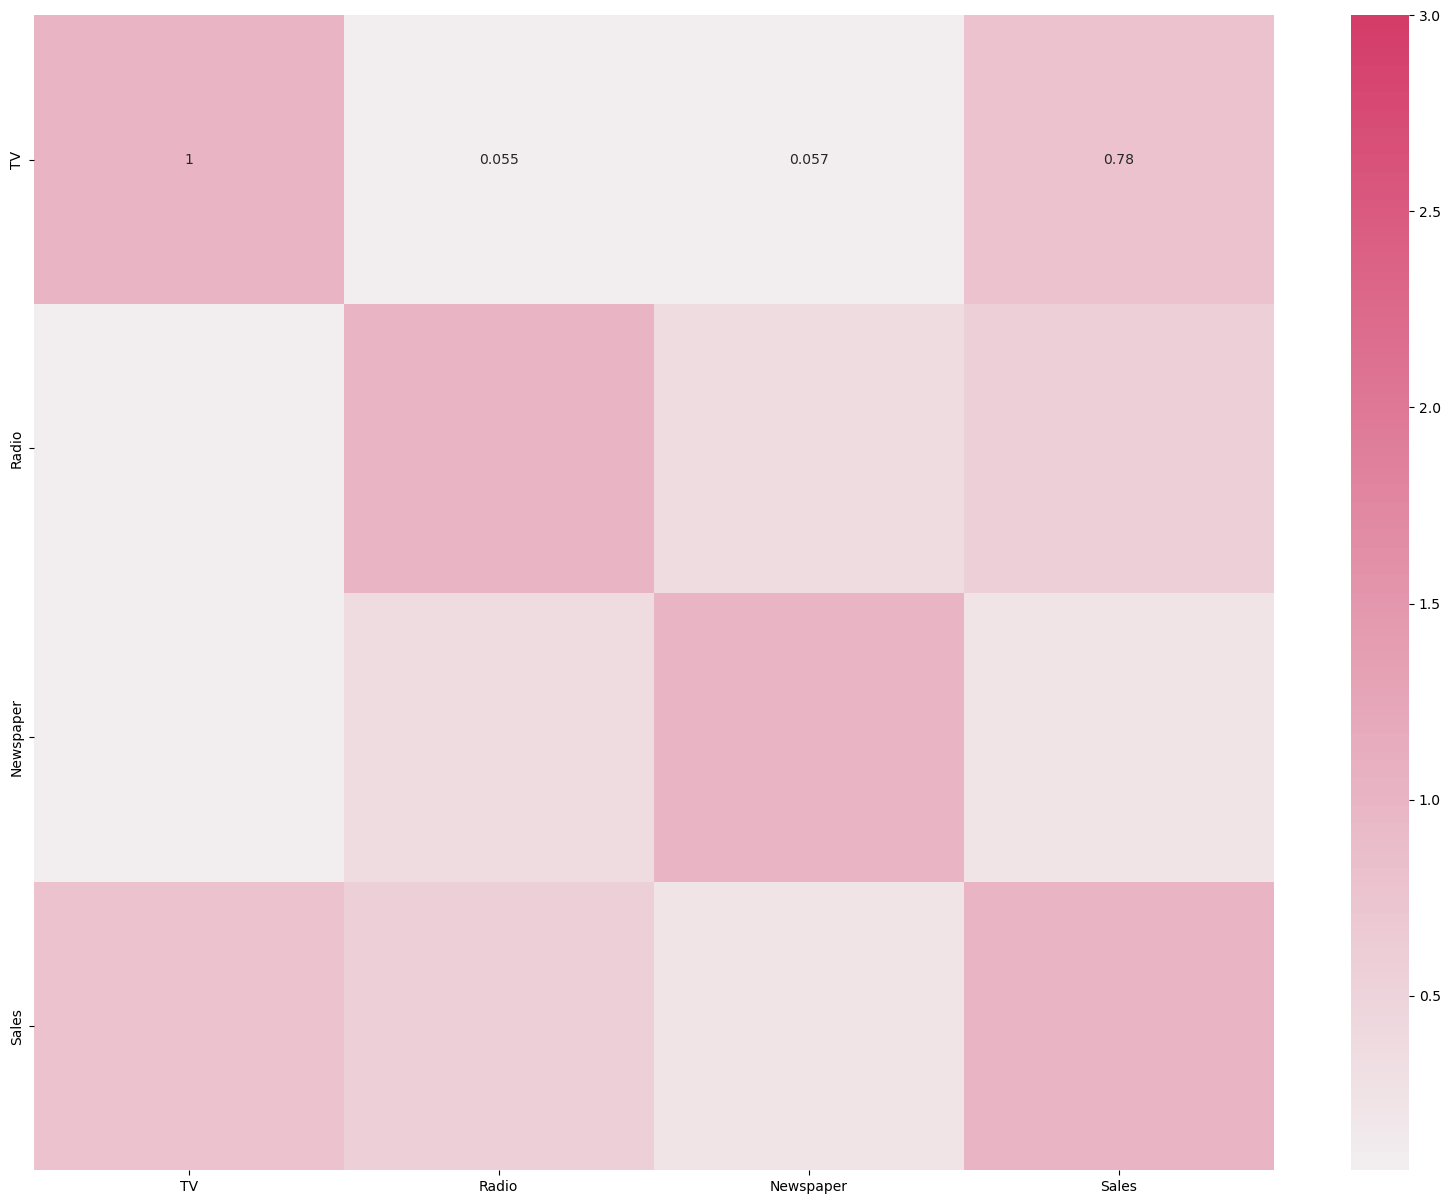

In [18]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (20,15))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(sales_data.iloc[:,:].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

<Figure size 3000x7000 with 0 Axes>

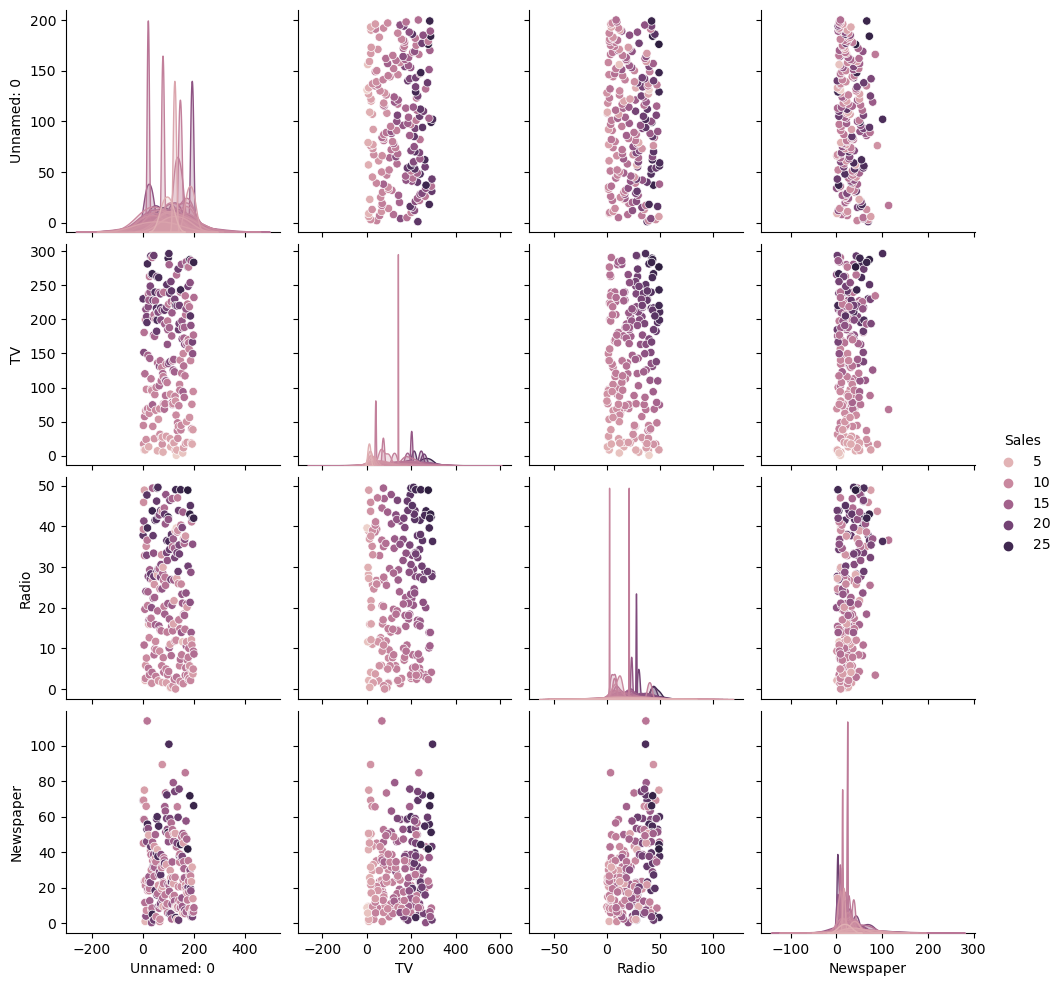

In [19]:
plt.figure(figsize = (30,70))
plt.tight_layout(pad = 3.0)
sns.pairplot(raw_data, hue = 'Sales')

In [20]:
targets = np.array(sales_data['Sales'])
features_raw = sales_data
features_raw = features_raw.drop(['Sales'], axis = 1)
features = np.array(features_raw)

In [21]:
mae = []
mse =[]
r2 = []
regressor = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR()]
for i in range (7):
    for j in range (500):
        x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = j ,test_size = 0.2, shuffle = True)
        test_regressor = regressor[i]
        test_regressor.fit(x_train,y_train)
        y_predict = test_regressor.predict(x_test)
        mae.append(mean_absolute_error(y_test,y_predict))
        mse.append(mean_squared_error(y_test,y_predict))
        r2.append(r2_score(y_test,y_predict))
        print('Trial run '+str(i+1)+'.'+str(j)+' Regressor : ' + str(test_regressor) + ' completed : MAE =  '+str(mean_absolute_error(y_test,y_predict))+ ' MSE =  '+str(mean_squared_error(y_test,y_predict))+' R2 Score =  '+str(r2_score(y_test,y_predict)))

Trial run 1.0 Regressor : LinearRegression() completed : MAE =  0.26165979659232047 MSE =  0.16252528754908885 R2 Score =  0.8601145185017868
Trial run 1.1 Regressor : LinearRegression() completed : MAE =  0.19987243199696345 MSE =  0.0735399983922829 R2 Score =  0.8927605914615386
Trial run 1.2 Regressor : LinearRegression() completed : MAE =  0.3163238081426119 MSE =  0.1662544690154984 R2 Score =  0.7575894500772731
Trial run 1.3 Regressor : LinearRegression() completed : MAE =  0.23032434827565434 MSE =  0.07951717794943576 R2 Score =  0.9138375011080566
Trial run 1.4 Regressor : LinearRegression() completed : MAE =  0.2327818878309597 MSE =  0.08185675435040952 R2 Score =  0.9085774752313169
Trial run 1.5 Regressor : LinearRegression() completed : MAE =  0.24352366250146568 MSE =  0.0941810806267081 R2 Score =  0.8984204533332628
Trial run 1.6 Regressor : LinearRegression() completed : MAE =  0.20095400867865615 MSE =  0.06811924863923406 R2 Score =  0.9224333473922031
Trial run 1

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define and train a regressor (e.g., Linear Regression)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Define a scaler (e.g., StandardScaler) and fit it on the training data
sales_scaler = StandardScaler()
sales_scaler.fit(y_train.reshape(-1, 1))  # Fit the scaler on the training labels

# Make predictions on the test set
y_predicted = regressor.predict(x_test)

# Rescale the predictions using the fitted scaler
y_predicted_rescaled = sales_scaler.inverse_transform(y_predicted.reshape(-1, 1))

# Rescale the actual test values (assuming y_test is already fitted)
y_test_rescaled = sales_scaler.inverse_transform(y_test.reshape(-1, 1))


In [27]:
real_values = np.array(np.round(y_test_rescaled, 2)).tolist()
predicted_values = np.array(np.round(y_predicted_rescaled, 2)).tolist()

df = pd.DataFrame({'Actual Item Outlet Sales': real_values, 'Predicted Outlet Item Sales': predicted_values})
print ('\n')
print(df.head(20))
print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe Mean Squared Error is : ' + str(mean_squared_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe R2 Score is : ' + str(r2_score (y_test_rescaled, y_predicted_rescaled)))



   Actual Item Outlet Sales Predicted Outlet Item Sales
0                    [1.35]                      [1.08]
1                   [-0.49]                     [-0.01]
2                    [1.16]                      [1.19]
3                    [-1.4]                     [-1.23]
4                    [0.11]                       [0.7]
5                   [-0.43]                     [-0.52]
6                    [1.84]                      [1.34]
7                   [-0.53]                     [-0.05]
8                   [-1.73]                     [-1.08]
9                   [-0.34]                      [0.14]
10                  [-0.88]                     [-1.15]
11                  [-0.74]                     [-0.39]
12                   [0.79]                      [0.69]
13                  [-0.53]                     [-0.71]
14                  [-0.38]                      [0.13]
15                   [2.17]                      [1.72]
16                  [-0.47]                   

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define and train a regressor (e.g., Linear Regression)
regressor = LinearRegression()
regressor.fit(features, targets)

# Define a scaler (e.g., StandardScaler) for rescaling predictions
sales_scaler = StandardScaler()
sales_scaler.fit(targets.reshape(-1, 1))  # Fit the scaler on the target variable

# Make predictions on the features
targets_predicted = regressor.predict(features)

# Rescale the predictions
targets_predicted_rescaled = sales_scaler.inverse_transform(targets_predicted.reshape(-1, 1))

# Round the predictions to two decimal places and convert to list
predictions = np.round(targets_predicted_rescaled, 2).tolist()

# Create a pandas Series from the predictions
predicted_sales = pd.Series(predictions)


In [30]:
dataset_final = pd.concat([raw_data,predicted_sales],axis = 1)
dataset_final.columns.values[5] = 'Predicted_Sales'
dataset_final['Predicted_Sales'] = dataset_final['Predicted_Sales'].astype(str)
dataset_final.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted_Sales
0,1,230.1,37.8,69.2,22.1,[1.25]
1,2,44.5,39.3,45.1,10.4,[-0.32]
2,3,17.2,45.9,69.3,9.3,[-0.33]
3,4,151.5,41.3,58.5,18.5,[0.69]
4,5,180.8,10.8,58.4,12.9,[-0.16]


In [31]:
dataset_final.head(25)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted_Sales
0,1,230.1,37.8,69.2,22.1,[1.25]
1,2,44.5,39.3,45.1,10.4,[-0.32]
2,3,17.2,45.9,69.3,9.3,[-0.33]
3,4,151.5,41.3,58.5,18.5,[0.69]
4,5,180.8,10.8,58.4,12.9,[-0.16]
5,6,8.7,48.9,75.0,7.2,[-0.3]
6,7,57.5,32.8,23.5,11.8,[-0.44]
7,8,120.2,19.6,11.6,13.2,[-0.36]
8,9,8.6,2.1,1.0,4.8,[-1.98]
9,10,199.8,2.6,21.2,10.6,[-0.28]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Actual Item Outlet Sales     40 non-null     object
 1   Predicted Outlet Item Sales  40 non-null     object
dtypes: object(2)
memory usage: 772.0+ bytes


In [34]:
df.columns

Index(['Actual Item Outlet Sales', 'Predicted Outlet Item Sales'], dtype='object')

In [35]:
df.describe()

,Actual Item Outlet Sales,Predicted Outlet Item Sales
count,40,40
unique,34,38
top,[-0.34],[-1.23]
freq,2,2


In [41]:
df.isnull().sum()

Actual Item Outlet Sales       0
Predicted Outlet Item Sales    0
dtype: int64

In [43]:
import seaborn as sns

# Check column data types to ensure they are numeric
print(df.dtypes)

# Filter out numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check if there are at least two numeric columns
if len(numeric_columns) < 2:
    print("Error: Not enough numeric columns to create a pairplot")
else:
    # Create pairplot
    sns.pairplot(df[numeric_columns])


Actual Item Outlet Sales       object
Predicted Outlet Item Sales    object
dtype: object
Error: Not enough numeric columns to create a pairplot
